In [30]:
%pylab inline
%matplotlib notebook
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
ETA = 0

Populating the interactive namespace from numpy and matplotlib


# Potencial Henón - Heiles 

$
V\left(x,y\right)=\frac{1}{2}\left (x^{2} + y^{2} \right) +  \eta\left (x^{2}y - \frac{1}{3}y^{3} \right)
$

In [2]:
#Función de potencial Henón - Heiles
def V(x,y):
    return 0.5*(x**2 + y**2 + 2*ETA*y*(x**2) - ((2.0*ETA)/3.0)*(y**3))

# Ecuaciones de movimiento

$p_{x}=\dot{x}$

$p_{y}=\dot{y}$

$\dot{P_{x}} = -\frac{\partial H}{\partial x} = \ddot{x} = - x - 2\eta xy$

$ \dot{P_{y}} = -\frac{\partial H}{\partial y} = \ddot{y} =  -y - x^{2} + \eta y^{2}$

In [3]:
def ecuaciones(x,t):
    #Estado actual
    xi =  x[0]
    yi =  x[1]
    pxi = x[2]
    pyi = x[3]
    
    #Ecuaciones de movimiento
    EM0 = pxi
    EM1 = pyi
    EM2 = -xi -2*xi*yi*ETA
    EM3 = -yi + ETA*yi**2 - xi**2
    return [EM0, EM1, EM2, EM3]

In [4]:
def poincare(x0,y0,py0,E,dT,T_max):
    #Por lo explicado en el articulo solo se utilizan energias menores o iguales a 1/6
    if E > (1/6):
        print("Escoja una energia menor a 1/6")
        return

    V0 = V(x0,y0) #Potencial en el punto inicial
    px0 = sqrt(2*(E - V0) - py0**2) #Valor inical de momento en x (px)
    X0 = [x0,y0,px0,py0] #Vector de estado inicla
    tiempo = linspace(0,T_max,int(T_max/dT)) #Genera el numero de pasos de tiempo
    
    # Solucion con ODE:
    Sol = odeint(ecuaciones, X0, tiempo)
    
    X   = Sol[:, 0]
    Y   = Sol[:, 1]
    Px  = Sol[:, 2]
    Py  = Sol[:, 3]

    prueba = 0.0
    zeros = array([[],[]])
    
    i = 0
    #buscar  los ceros para el Poincare
    while i < (X.shape[0]-1):
        if ((X[i] < prueba) and (X[i+1] > prueba)) or ((X[i] > prueba) and (X[i+1] < prueba)):
            puntos = array([[0.5*(Y[i]+Y[i+1])], [0.5*(Py[i]+Py[i+1])]])
            zeros = hstack((zeros,puntos))
        i = i + 1
    
    return zeros

In [5]:
def graphPoincare(y0i,y0f,dy0i,dy0f,E,dT,T_max,n,ds):
    #Genera un rango de valores de y y Py
    y0 = linspace(y0i,y0f,n)
    dy0 = linspace(dy0i,dy0f,n)
    
    fig, ax = plt.subplots()    
    #Prueba todas las combinaciones y y Py y las grafica
    #ds es el tamaño del punto en los graficos
    for i in range(n):
        for j in range(n):
            zeros = poincare(0,y0[i],dy0[j],E,dT,T_max)
            texto ='y=' + str(y0[i]) + ' , Py =' + str(dy0[j])
            ax.scatter(zeros[0], zeros[1], s = ds,label = texto, marker = ".")
    
    ax.set_xlabel("y")
    ax.set_ylabel("Py")
    Thetitle = "Mapa de Poincare con \u03B7 ="+str(ETA) + " y con E =" + str(E)
    ax.set_title(Thetitle)
    
    #pos = ax.get_position()
    #ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3)

In [6]:
def orbita(x0,y0,py0,E,dT,T_max):
    #Por lo explicado en el articulo solo se utilizan energias menores o iguales a 1/6
    if E > (1/6):
        print("Escoja una energia menor a 1/6")
        return

    V0 = V(x0,y0) #Potencial en el punto inicial
    px0 = sqrt(2*(E - V0) - py0**2) #Valor inical de momento en x (px)
    X0 = [x0,y0,px0,py0] #Vector de estado inicla
    tiempo = linspace(0,T_max,int(T_max/dT)) #Genera el numero de pasos de tiempo

    # Solucion con ODE:
    Sol = odeint(ecuaciones, X0, tiempo)

    return Sol

In [7]:
def graph2D(Sol):
    plt.figure()
    plt.plot(Sol[:,0],Sol[:,1],linewidth=0.1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [8]:
def graph3D(Sol):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    cset = ax.plot(Sol[:,1],Sol[:,0],Sol[:,3],linewidth=0.1)
    ax.clabel(cset, fontsize=9, inline=1)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_zlabel('Py')

<a href="https://imgbb.com/"><img src="https://i.ibb.co/0CWCXcr/Legend.png" alt="Legend" border="0"></a>

<IPython.core.display.Javascript object>


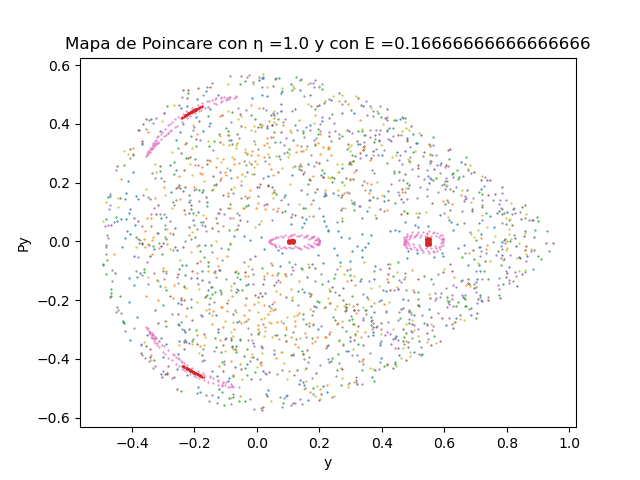

In [43]:
#Para cambiar el valor del coeficiente debe cambiar la variable global
ETA = 10*10**(-1)
graphPoincare(0,0.2,0,0.2,1/6,0.1,10**3,3,1)

<IPython.core.display.Javascript object>


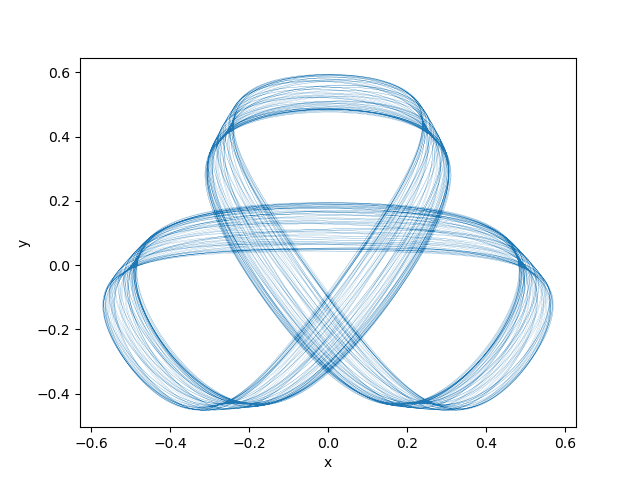

<IPython.core.display.Javascript object>


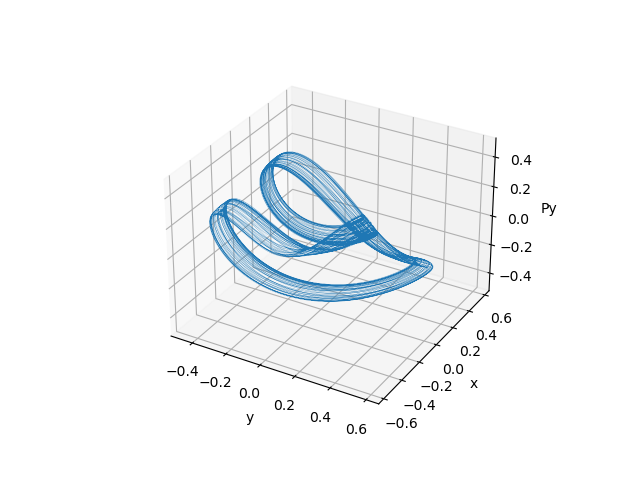

In [44]:
Sol = orbita(0,0.128846,0.018450,1/6,0.02,1000)
graph2D(Sol)
graph3D(Sol)